                                               **Project - 95**
                                          
                                        -- Money Laundering Detection --

# Business Problem :

 ## Designing and Executing an Anti-Money Laundering Program: Minimizing Risk and Adhering to Regulatory Requirements

## Developing and Implementing an Effective Anti-Money Laundering Strategy: Mitigating Financial Risk and Ensuring Compliance. Detection of Money Laundering Activity.
        
        
## Business Objective :

   ### Minimise :
   
        Due diligence
        Financial crimes/risks
        Corruption with report
        Operational inefficiencies
        False Alarms
        
## Business Constraints :

   ### Maximise :
   
        Effective Transaction monitoring
        Effective reporting mechanism
        Compliance measures
        AML Policies
        Customer Convenience"

In [1]:
## Importing required libraries for analysis

import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Loading the dataset to Preprocess the data
df = pd.read_csv("Money_Laundering_Dataset.csv")
df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [3]:
## Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [4]:
## Finding null values
df.isna().sum()

Unnamed: 0          3
step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

#### Null Values are present and need to perform SimpleImputer Median for Numerical & Most_Frequent to categorical variable.

In [5]:
## Finding duplicates in Rows
df.duplicated().sum()

0

In [6]:
## Finding duplicates in columns
df.transpose().duplicated().sum()

0

#### No Dupliacted values found in Columns & Rows

In [7]:
## Dropping un-useful column
df = df.drop('Unnamed: 0', axis=1)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [8]:
## Using Median Simple Imputer to convert Null Values Present in Numericals

from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

imputer = SimpleImputer(strategy='median')

# Impute the missing values
df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [9]:
## Most_Frequent for convertinig null values for Categorical Variable

from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_col1 = ['step', 'nameOrig', 'nameDest','isFraud','isFlaggedFraud']

# Create a KNN imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values
df[missing_col1] = imputer.fit_transform(df[missing_col1])

#### Getting Zero Null Values after using Imputation technique to convert the null values into categorical values.

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

###  This will helpp us to check if there are any mismatches in the balance at the origin and destination after a transaction is made, and calculates the percentage of transactions that have balance errors.

In [11]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    98.4
0     1.6
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 1    92.73
0     7.27
Name: error_dest, dtype: float64


#### creates two new columns in a pandas DataFrame df, newbalanceSender and newbalanceReceiver, which represent the updated balances for the sender and receiver accounts after a transaction has occurred. Also, this helps us to  ensure that the transactions have been processed correctly and that the account balances have been updated appropriately.

In [12]:
df['newbalanceSender']= df['oldbalanceOrg'] - df['amount'].astype(float)
df['newbalanceReceiver'] = df['oldbalanceDest'] + df['amount'].astype(float)

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0,1,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0,1,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0,1,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0,1,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0,1,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0,1,1,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0,1,1,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0,1,1,-163674.91,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0,1,1,-62137.17,674872.83


In [14]:
### Replacing negative integers with zero using a lambda function. Neg Values are Present in newbalanceSender

df['newbalanceSender'] = df['newbalanceSender'].apply(lambda x: 0 if x < 0 else x)

# print the updated DataFrame
print(df)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       1.0   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1       1.0   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2       1.0  TRANSFER     181.00  C1305486145          181.0            0.00   
3       1.0  CASH_OUT     181.00   C840083671          181.0            0.00   
4       1.0   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...     ...       ...        ...          ...            ...             ...   
99995  10.0   PAYMENT    4020.66  C1410794718        20100.0       155908.34   
99996  10.0   PAYMENT   18345.49   C744303677        20100.0            0.00   
99997  10.0   CASH_IN  183774.91   C104331851        20100.0       222947.91   
99998  10.0  CASH_OUT   82237.17   C707662966        20100.0            0.00   
99999  10.0   PAYMENT   20096.56  C1868032458        20100.0        90020.44   

          nameDest  oldbalanceDest  new

#### Lets us to check if there are any mismatches in the balance at the origin and destination after a transaction is made, and calculates the percentage of transactions that have balance error

In [15]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] <= df["newbalanceSender"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceReceiver"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    100.0
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 0    100.0
Name: error_dest, dtype: float64


In [16]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,1,0,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,1,0,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,1,0,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,1,0,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,1,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0,1,0,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0,1,0,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0,1,0,0.00,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0,1,0,0.00,674872.83


In [17]:
## Dropping the unrequired columns 
df = df.drop(['error_orig','error_dest','newbalanceOrig','newbalanceDest'],axis = 1)
df

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.00,0.0,0.0,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.00,0.0,0.0,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,C553264065,0.00,1.0,0.0,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.00,1.0,0.0,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.00,0.0,0.0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,M1257036576,0.00,0.0,0.0,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,M1785344556,0.00,0.0,0.0,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,C36392889,54925.05,0.0,0.0,0.00,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,C1553004158,592635.66,0.0,0.0,0.00,674872.83


In [18]:
## Converting the Object into Integer

df['isFraud']= df['isFraud'].astype('int64')
df['step']= df['step'].astype('int64')
df['isFlaggedFraud']= df['isFlaggedFraud'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   step                100000 non-null  int64  
 1   type                100000 non-null  object 
 2   amount              100000 non-null  float64
 3   nameOrig            100000 non-null  object 
 4   oldbalanceOrg       100000 non-null  float64
 5   nameDest            100000 non-null  object 
 6   oldbalanceDest      100000 non-null  float64
 7   isFraud             100000 non-null  int64  
 8   isFlaggedFraud      100000 non-null  int64  
 9   newbalanceSender    100000 non-null  float64
 10  newbalanceReceiver  100000 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [20]:
## Renaming the column names as mentioned

df = df.rename(columns={'newbalanceSender': 'newbalanceOrg', 'newbalanceReceiver': 'newbalanceDest'})
df

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,newbalanceOrg,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.00,0,0,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.00,0,0,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.00,1,0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.00,0,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,M1257036576,0.00,0,0,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,M1785344556,0.00,0,0,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,C36392889,54925.05,0,0,0.00,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,C1553004158,592635.66,0,0,0.00,674872.83


In [21]:
# Rearranging the columns

df = df[['step','type','amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

# print the rearranged DataFrame

print('Rearranged DataFrame:')
df.columns

Rearranged DataFrame:


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### First Business Moment Decision

In [22]:
## Calculates the Mean (average) of the values in the 'amount' column
df['amount'].mean()

173602.22176409996

In [23]:
## Calculates the Median value of the 'amount' column

df['amount'].median()

52745.520000000004

In [24]:
## Calculates the Mode value of the 'amount' column

df['amount'].mode()

0     2475.13
1     6285.19
2    17320.91
3    25975.86
4    29707.86
5    89631.24
Name: amount, dtype: float64

### Second Business Moment Decision

In [25]:
## Checking the Variance in 'amount' columns.
df['amount'].var()

118542710414.3486

In [26]:
## Calculates the standard deviation of the values in the 'amount' column
df['amount'].std()

344300.3200903952

### Third Business Moment Decision

In [27]:
## Calculating the Skewness of each column in dataset.
df.skew()

step               -2.543341
amount              5.428317
oldbalanceOrg       4.958011
newbalanceOrg       5.044601
oldbalanceDest      5.058239
newbalanceDest      4.766104
isFraud            15.426444
isFlaggedFraud    316.227766
dtype: float64

### Fourth Business Moment Decision

In [28]:
## Calculating the Kurtosis of each column in dataset.
df.kurt()

step                   7.313596
amount                48.099033
oldbalanceOrg         31.579922
newbalanceOrg         32.616930
oldbalanceDest        32.493201
newbalanceDest        29.197520
isFraud              235.979882
isFlaggedFraud    100000.000000
dtype: float64

<Axes: >

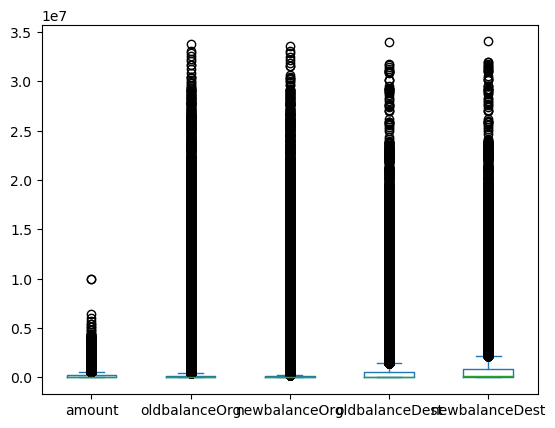

In [29]:
# Creating box plot to check outliers

df[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']].plot(kind='box')

### Loops through a list of selected columns in a pandas DataFrame and calculates the percentage of outliers in each column.

In [30]:
# Define the columns you want to loop through
columns_to_loop = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest',]

# Loop through the selected columns and calculate the percentage of outliers
for column in columns_to_loop:
    data_column = df[column].values

    # Define the lower and upper bounds of the range of non-outliers
    q1, q3 = np.percentile(data_column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calculate the number of outliers
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    num_outliers = len(outliers)

    # Calculate the percentage of outliers
    percent_outliers = (num_outliers / len(data_column)) * 100

    print("Column:", column)
    print("Percentage of outliers:", percent_outliers)

Column: amount
Percentage of outliers: 6.4
Column: oldbalanceOrg
Percentage of outliers: 18.337999999999997
Column: newbalanceOrg
Percentage of outliers: 20.047
Column: oldbalanceDest
Percentage of outliers: 14.173
Column: newbalanceDest
Percentage of outliers: 11.919


### Creating the correlation matrix & Heatmap of matrix which shows the correlation values between the different features with positive correlations shown in warm colors (reds) and negative correlations shown in cool colors (blues). The darker the color, the stronger the correlation between two features.

### Can understand the relationships between different variables in the dataset 

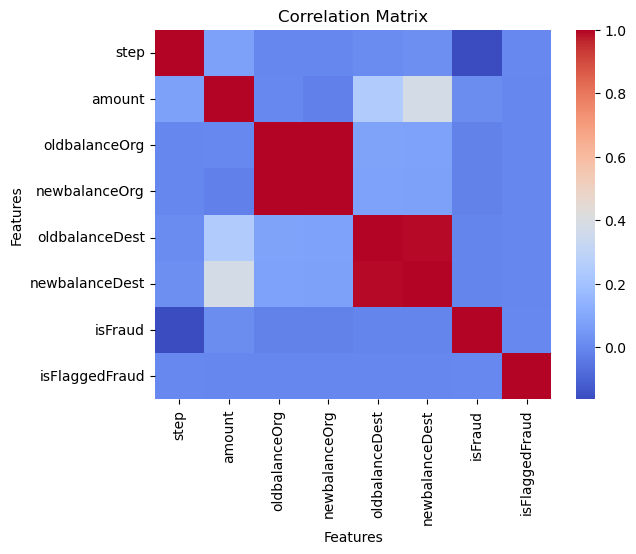

In [31]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Data Visualization
### Count Plots

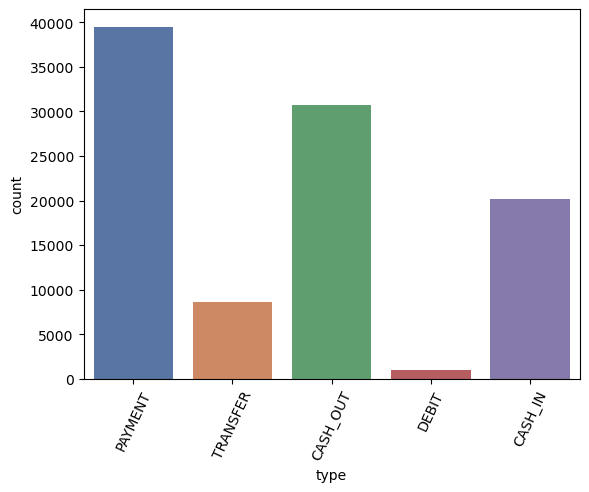

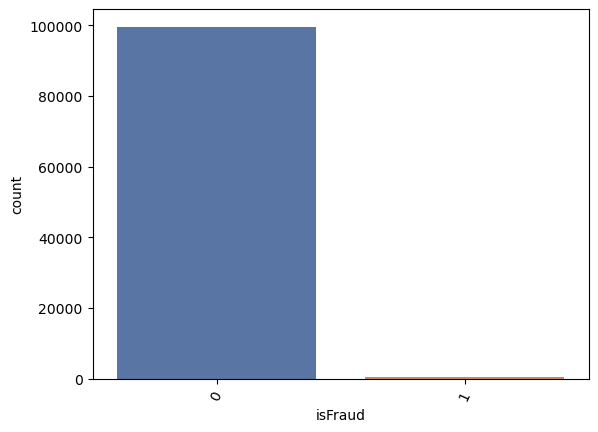

In [32]:
features_category = ['type','isFraud']
for feature in features_category:
  sns.countplot(data=df, x=feature, palette='deep')
  plt.xticks(rotation=65)
  plt.show()

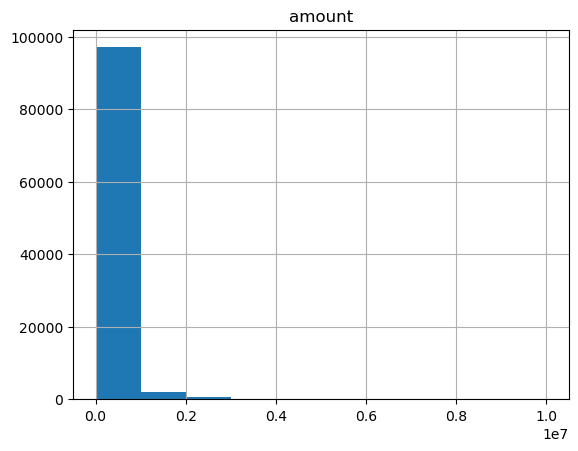

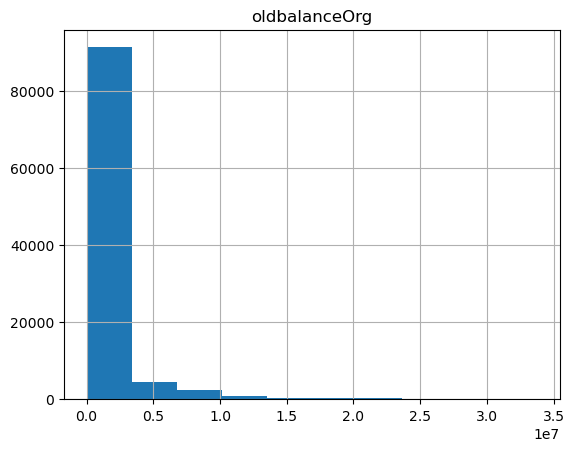

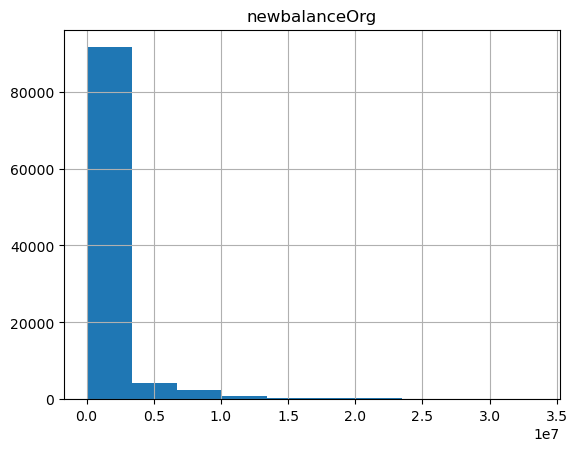

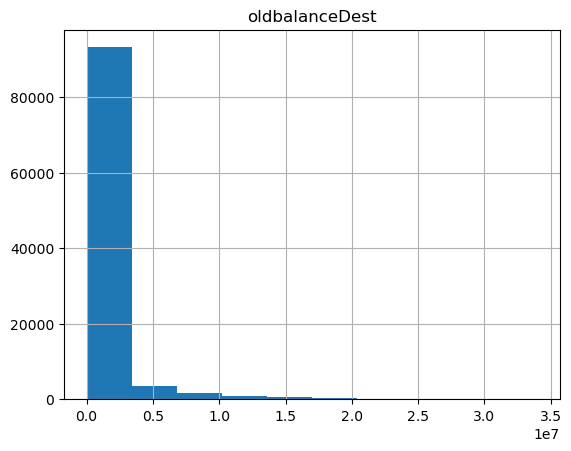

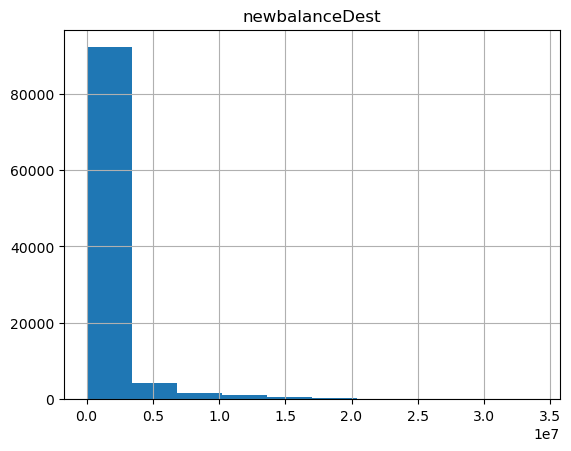

In [33]:
## Select columns for which histograms to be created

cols = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']

#for loop to create histograms 
for col in cols:      #iterate over the columns in the dataset 
    df[col].hist()   #create a histogram of the current column 
    plt.title(col)   #set title as the current column 
    plt.show()

### Count plot using seaborn library, Plot displays the frequency distribution. The absolute count values of each corresponding bar in the plot. 

[Text(0, 0, '39512'),
 Text(0, 0, '30718'),
 Text(0, 0, '20185'),
 Text(0, 0, '8597'),
 Text(0, 0, '988')]

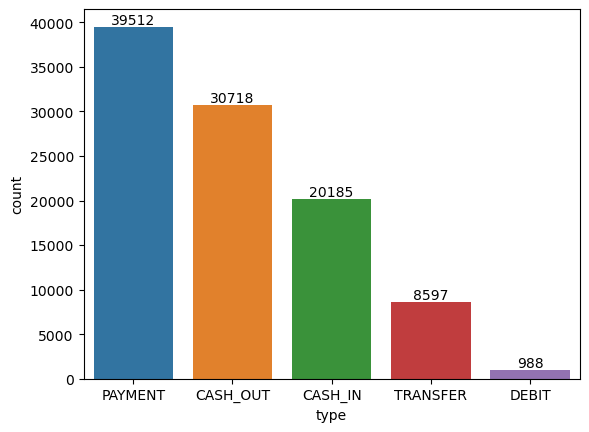

In [34]:
ax = sns.countplot(x = df['type'],
                   order = df['type'].value_counts (ascending=False).index);
abs_values = df['type'].value_counts (ascending = False).values 
                          
ax.bar_label (container=ax.containers[0], labels=abs_values)

### Converting the Step which is in Hours to be converted into Time Format which will help in differentiating

In [35]:
## Converting step into time
df['step'] = pd.to_datetime("01/01/2022") + pd.to_timedelta(df['step'], unit='h')
df['step'].sample(10)

4240    2022-01-01 03:00:00
93697   2022-01-01 10:00:00
30550   2022-01-01 08:00:00
46534   2022-01-01 09:00:00
3520    2022-01-01 02:00:00
65888   2022-01-01 09:00:00
82480   2022-01-01 10:00:00
26371   2022-01-01 08:00:00
80695   2022-01-01 10:00:00
84979   2022-01-01 10:00:00
Name: step, dtype: datetime64[ns]

### Converting & Creating new column by converting time into Night, Morning, Afternoon, Evening, by converting Step into Hours Basis

In [36]:
# create new column to get morning, afternoon, evening, or night
df['step'] = pd.cut(df['step'].dt.hour,
                        bins=[0, 6, 12, 18, 24], 
                        labels = ['night','morning','afternoon','evening'],
                        include_lowest = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
 8   isFlaggedFraud  100000 non-null  int64   
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 6.2+ MB


### Creating a Pie Chart for categorical variable 'Step'. 

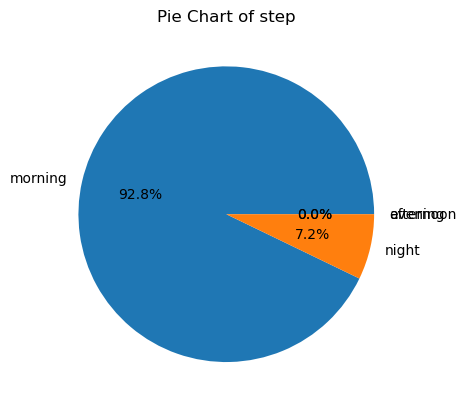

In [37]:
features_object = ['step']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
 8   isFlaggedFraud  100000 non-null  int64   
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 6.2+ MB


In [39]:
df = df.drop(['isFlaggedFraud'],axis=1)
df

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,night,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,night,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,night,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,night,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,night,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
99995,morning,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,morning,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,morning,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,morning,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 5.4+ MB


In [41]:
## Dropping the step column to perform and build the model based on remaining columns
df1 = df.drop(['step'], axis=1)
df1

,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [42]:
# separating the data and labels
X = df1.drop(columns = 'isFraud', axis=1)
y = df1['isFraud']

### One hot encoding is a technique used in data preprocessing to represent categorical variables as numerical variables. It is used because many machine learning algorithms cannot directly process categorical variables.

In [43]:
# Perform one-hot encoding on a categorical column
one_hot_encoded = pd.get_dummies(X['type'])

# Concatenate the one-hot encoded columns to the original dataset

X = pd.concat([X, one_hot_encoded], axis=1)

# Drop the original categorical column from the dataset
X = X.drop('type', axis=1)

### To scale numerical data to have a common range. 
#### Compare Features
#### Improve performance
#### Reduce bias
#### Avoid numerical instability

In [44]:
from sklearn.preprocessing import MinMaxScaler

# select the columns to normalize
cols_to_normalize = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']

# create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# fit the scaler to the selected columns and transform the data
X[cols_to_normalize] = scaler.fit_transform(X[cols_to_normalize])

# display the first few rows of the normalized data
print(X.head())

     amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  newbalanceDest  \
0  0.000984       0.005034       0.004775        0.000000        0.000289   
1  0.000186       0.000629       0.000577        0.000000        0.000055   
2  0.000018       0.000005       0.000000        0.000000        0.000005   
3  0.000018       0.000005       0.000000        0.000623        0.000627   
4  0.001167       0.001230       0.000890        0.000000        0.000343   

   CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0        0         0      0        1         0  
1        0         0      0        1         0  
2        0         0      0        0         1  
3        0         1      0        0         0  
4        0         0      0        1         0  


### SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address the problem of class imbalance in binary classification problems. In class imbalance, the dataset has a disproportionate ratio of observations in each class. By generating synthetic samples of the minority class to balance the dataset. It creates new samples by interpolating between the minority class samples. 

In [45]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state=42)

# Resample data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [46]:
X = X_resampled
X

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000984,0.005034,0.004775,0.000000,0.000289,0,0,0,1,0
1,0.000186,0.000629,0.000577,0.000000,0.000055,0,0,0,1,0
2,0.000018,0.000005,0.000000,0.000000,0.000005,0,0,0,0,1
3,0.000018,0.000005,0.000000,0.000623,0.000627,0,1,0,0,0
4,0.001167,0.001230,0.000890,0.000000,0.000343,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
199165,0.003591,0.000063,0.000000,0.001346,0.002400,0,1,0,0,0
199166,0.000430,0.003405,0.003348,0.036340,0.036427,0,0,1,0,0
199167,0.168870,0.012539,0.000000,0.041568,0.091125,0,0,0,0,1
199168,0.000794,0.000271,0.000036,0.000000,0.000233,0,0,0,1,0


In [47]:
y = y_resampled
y

0         0
1         0
2         1
3         1
4         0
         ..
199165    1
199166    1
199167    1
199168    1
199169    1
Name: isFraud, Length: 199170, dtype: int64

In [48]:
## split the dataset into training and testing sets for a machine learning model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine learning Models to train and evaluate various classifiers on a SMOTE dataset to detect fraudulent financial transactions. To address class imbalance in a binary classification problem where the positive class (fraudulent transactions) is the minority class and the negative class (legitimate transactions) is the majority class. SMOTE generates synthetic samples of the minority class by interpolating between existing samples. This creates a balanced dataset that can improve the performance of our machine learning models in detecting fraudulent transactions.

## Train & Test accuracy 'With' and 'Without' Grid Search

### A statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome.

In [49]:
import pandas pd

SyntaxError: invalid syntax (3546497058.py, line 1)

In [50]:
### 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Create a Logistic Regression classifier
logreg_clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_clf.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = logreg_clf.predict(X_train)
test_pred = logreg_clf.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_precision = precision_score(y_train, train_pred, average='weighted')

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.623
Training F1 Score: 0.622
Training Recall Score: 0.623
Training Precision Score: 0.623
Test Accuracy: 0.622
Test F1 Score: 0.622
Test Recall Score: 0.622
Test Precision Score: 0.623


In [51]:
## LOGISTIC REGRESSION(With Grid Search)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# define the model
model = LogisticRegression()

# define the hyperparameters to tune with grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# define the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

# predict the labels of the training and test data with the best estimator from grid search
train_pred = grid_search.best_estimator_.predict(X_train)
test_pred = grid_search.best_estimator_.predict(X_test)

# calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Training Accuracy: 0.624
Training F1 Score: 0.614
Training Recall Score: 0.600
Training Precision Score: 0.629
Test Accuracy: 0.623
Test F1 Score: 0.615
Test Recall Score: 0.598
Test Precision Score: 0.633


## Train & Test accuracy 'With' and 'Without' Grid Search for Decision Tree

### A tree-structured model used for classification and regression, where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label.

In [52]:
## 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.642
Training F1 Score: 0.637
Training Recall Score: 0.629
Training Precision Score: 0.644
Test Accuracy: 0.642
Test F1 Score: 0.639
Test Recall Score: 0.630
Test Precision Score: 0.648


In [53]:
## DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
dt = DecisionTreeClassifier()

# Define hyperparameters to search over
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5],
              'max_features': ['sqrt', 'log2']}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the model with best hyperparameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.966
Training F1 Score: 0.966
Training Recall Score: 0.953
Training Precision Score: 0.978
Test Accuracy: 0.903
Test F1 Score: 0.904
Test Recall Score: 0.899
Test Precision Score: 0.908


## Train & Test accuracy 'With' and 'Without' Grid Search 'Random Forest Classifier'

### An ensemble learning method for classification, consisting of multiple decision trees and using bagging to reduce overfitting.

In [54]:
## 3.RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.720
Training F1 Score: 0.754
Training Recall Score: 0.860
Training Precision Score: 0.671
Test Accuracy: 0.721
Test F1 Score: 0.756
Test Recall Score: 0.859
Test Precision Score: 0.675


In [ ]:
## RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier()

# Create a Grid Search object with cross-validation
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the Grid Search object to the data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_

# Use the best model to make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate the evaluation metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Calculate the evaluation metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Training Accuracy:", train_acc)
print("Training Precision:", train_prec)
print("Training Recall:", train_rec)
print("Training F1 Score:", train_f1)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", test_f1)

## Train & Test accuracy 'With' and 'Without' Grid Search 'Naive Bayes'

### A probabilistic algorithm used for classification based on Bayes' theorem with strong independence assumptions between the features.

In [55]:
## 4. Naive Bayes(Without Grid Search)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

#Define the model
model = GaussianNB()

#Train the model
model.fit(X_train, y_train)

#Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

#Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

#Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.608
Training F1 Score: 0.705
Training Recall Score: 0.940
Training Precision Score: 0.564
Test Accuracy: 0.606
Test F1 Score: 0.706
Test Recall Score: 0.938
Test Precision Score: 0.566


In [56]:
## NAIYE BAYES(With Grid Search)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

# Define the model
model = GaussianNB()

# Set the hyperparameters to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Define the grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_

# Predict the labels of the training and test data using the best model
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.608
Training F1 Score: 0.705
Training Recall Score: 0.940
Training Precision Score: 0.564
Test Accuracy: 0.606
Test F1 Score: 0.706
Test Recall Score: 0.938
Test Precision Score: 0.566


## Train & Test accuracy 'With' and 'Without' Grid Search 'Xtreme Gradient Boosting'

### A tree-based gradient boosting algorithm that can be used for regression and classification problems.

In [57]:
## 5. Xtreme Gradient Boosting(Without Grid Search)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.893
Training F1 Score: 0.896
Training Recall Score: 0.918
Training Precision Score: 0.875
Test Accuracy: 0.886
Test F1 Score: 0.890
Test Recall Score: 0.910
Test Precision Score: 0.870


In [58]:
## XTREME GRADIENT BOOSTING (With Grid Search)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameters to be tuned using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.2, 0.3]}

# Create the GridSearchCV object
grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_

# Use the best model to predict labels on the training and test data
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

# Print the best hyperparameters
print('Best Hyperparameters:', grid.best_params_)

Training Accuracy: 0.886
Training F1 Score: 0.889
Training Recall Score: 0.911
Training Precision Score: 0.867
Test Accuracy: 0.881
Test F1 Score: 0.884
Test Recall Score: 0.906
Test Precision Score: 0.864
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150}


## Train & Test accuracy 'With' and 'Without' Grid Search 'Ensemble Techniques(Bagging)'

### A machine learning technique that involves training multiple models on different subsets of the data to reduce overfitting and improve accuracy.

In [59]:
## 6. ENSEMBLE TECHNIQUES (Without Grid Search)
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the model
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.985
Training F1 Score: 0.985
Training Recall Score: 0.985
Training Precision Score: 0.985
Test Accuracy: 0.925
Test F1 Score: 0.927
Test Recall Score: 0.940
Test Precision Score: 0.914


In [ ]:
## Ensemble Technique / BAGGING (With Grid Search)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

# Fit the best classifier on the training data
best_clf.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = best_clf.predict(X_train)
test_pred = best_clf.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

## Train & Test accuracy 'With' and 'Without' Grid Search 'Ensemble Techniques(Ada Boost)'

### A machine learning technique that combines weak learners into a strong learner by iteratively reweighting the data based on misclassification errors.

In [60]:
## 7. ENSEMBLE TECHNIQUES (Without Grid Search)
## ADABOOST

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost model
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

Training Accuracy: 0.723
Training F1 Score: 0.741
Training Recall Score: 0.795
Training Precision Score: 0.695
Test Accuracy: 0.723
Test F1 Score: 0.743
Test Recall Score: 0.792
Test Precision Score: 0.699


In [ ]:
## Ensemble Technique / ADA BOOST (With Grid Search)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = AdaBoostClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Predict the labels of the training and test data
train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

## Train & Test accuracy 'With' and 'Without' Grid Search 'Artificial Neural Network (ANN)'

### The structure and function of the human brain, used for complex tasks such as image and speech recognition.

In [ ]:
## 8. ARTIFICIAL NEURAL NETWORK

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the labels of the training and test data
train_pred = model.predict(X_train).round().astype(int).ravel()
test_pred = model.predict(X_test).round().astype(int).ravel()

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## ARTIFICIAL NEURAL NETWORK (With Grid Search)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

# define the function that creates the ANN model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the hyperparameters for grid search
batch_size = [32, 64]
epochs = [50, 100]
optimizer = ['adam', 'rmsprop']

# create the dictionary of hyperparameters
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

# create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# train the grid search object
grid_result = grid.fit(X_train, y_train)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print()

# get the best model from grid search
best_model = grid_result.best_estimator_

# predict the labels of the training and test data
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

## Train & Test accuracy 'With' and 'Without' Grid Search 'Gradient Boosting Classifier'

### A machine learning technique for regression and classification problems, using an ensemble of decision trees.

In [ ]:
## 9. GRADIENT BOOSTING CLASSIFIER (Without Grid Search)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

## Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

## Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

## Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## GRADIENT BOOSTING CLASSIFIER (With Grid Search)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

## Define the parameter grid to search
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [2, 3, 4],
'learning_rate': [0.01, 0.1, 1]
}

## Create a Gradient Boosting Classifier object
gbc = GradientBoostingClassifier()

## Create a Grid Search object with cross-validation
grid = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='accuracy', cv=5)

## Fit the Grid Search object to the data
grid.fit(X_train, y_train)

## Extract the best model from the grid search
best_model = grid.best_estimator_

## Use the best model to make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## Calculate the evaluation metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

## Calculate the evaluation metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

## Print the evaluation metrics
print("Training Accuracy:", train_acc)
print("Training Precision:", train_prec)
print("Training Recall:", train_rec)
print("Training F1 Score:", train_f1)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", test_f1)

## Train & Test accuracy 'With' and 'Without' Grid Search 'Light GBM Classifier'

### A gradient boosting framework that uses histogram-based algorithms to speed up training and improve accuracy.

In [ ]:
## 10. Light GBM Classifier (Without Grid Search)

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Define the model
model = LGBMClassifier()

## Train the model
model.fit(X_train, y_train)

## Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)

## Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)

## Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training Precision Score: {:.3f}'.format(train_precision))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training F1 Score: {:.3f}'.format(train_f1))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Precision Score: {:.3f}'.format(test_precision))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test F1 Score: {:.3f}'.format(test_f1))

In [ ]:
## LIGHT GBM (With Grid Search)

import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

# Define the model
model = lgb.LGBMClassifier()

# Define hyperparameters to tune
parameters = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

# Use GridSearchCV to find the best hyperparameters
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", clf.best_params_)

# Train the model with the best hyperparameters
model = lgb.LGBMClassifier(**clf.best_params_)
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

## Train & Test accuracy 'With' and 'Without' Grid Search 'Cat Boost'

### A gradient boosting framework that uses histogram-based algorithms to speed up training and improve accuracy.

In [ ]:
## 11. CATBOOST (Without Grid Search)

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42)

# Train the model
model.fit(X_train, y_train, verbose=False)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## CAT BOOST (With Grid Search)

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid to search
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Create a CatBoost Classifier object
cbc = CatBoostClassifier()

# Create a Grid Search object with cross-validation
grid = GridSearchCV(estimator=cbc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the Grid Search object to the data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_

# Use the best model to make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate the evaluation metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Calculate the evaluation metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Training Accuracy:", train_acc)
print("Training Precision:", train_prec)
print("Training Recall:", train_rec)
print("Training F1 Score:", train_f1)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", test_f1)

## Train & Test accuracy 'With' and 'Without' Grid Search 'K-Nearest Neighbors Algorithm'

### A non-parametric algorithm used for classification and regression, where an object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

In [ ]:
## 12. K-Nearest Neighbors Algorithm (Without Grid Search)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## K-Nearest Neighbors Algorithm (With Grid Search)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = KNeighborsClassifier()

# Define the hyperparameters to search over
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}

# Define the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_

# Create a new model with the best hyperparameters
model = KNeighborsClassifier(**best_params)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [68]:
##Predictive System

import pickle
file = 'model.pkl'
pickle.dump(XGBClassifier, open(file,'wb'))